In [78]:
import h5py
import pandas as pd
import numpy as np
import time
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn import preprocessing
from sklearn.manifold import TSNE

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pd.DataFrame(f[filename][:], dtype=np.float64)

#train = load_data('data/train')
train = load_data('data/test')
test = train
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (160651, 164)
Shape of test data set: (160651, 164)


In [79]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

In [80]:
best_variables = ['p_pt_track', 'p_eCluster', 'p_rawECluster', 'p_eAccCluster', 'p_E7x11_Lr2']
best_variables2 = ['p_eClusterLr1', 'p_E_Lr1_MedG', 'p_e1152', 'p_f1core', 'p_E3x5_Lr1']
X = train[all_variables]
#y = train['p_truth_E']


X_real = test[best_variables2]
    
#making a cut of the data
n = 30000
idxs = np.arange(train.shape[0])
idxs_rand = np.random.choice(idxs, size=n)
train_cut = train.iloc[idxs_rand]

X_cut = train_cut[best_variables]
#y_cut = train_cut['Truth']

transform = preprocessing.Normalizer(norm='max')
X_norm = transform.fit_transform(X_real)

transform = preprocessing.StandardScaler()
X_std = transform.fit_transform(X_norm)

#input_train, input_test, truth_train, truth_test = train_test_split(X_std, y_cut, test_size=0.1, random_state=42)

print (f'Shape of X: {X_std.shape}')
#print (f'Shape of y: {y.shape}')
#print (f'Shape of X_real: {X_real.shape}')

Shape of X: (160651, 5)


In [81]:
from sklearn.cluster import KMeans
#Initialize the class object
pca = PCA(n_components=2, svd_solver='full')
X_pca = pca.fit_transform(X_std)
#X_test = pca.fit_transform(input_test)
kmeans = KMeans(n_clusters=3, init = 'k-means++', n_init=5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X_pca)
label.shape
results_v1 = pd.DataFrame(label)
results_v1.to_csv('solutions/Clustering_SW_kmeans_v2.txt', sep=',', header=False)

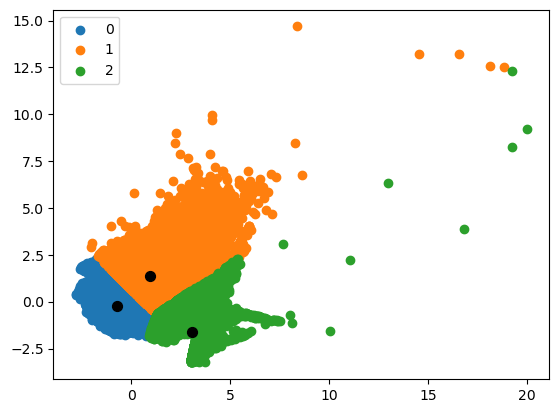

In [82]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
#plt.ylim(-0.1e6, 0.1e6)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
plt.legend()
plt.show()

In [36]:
Kmean = KMeans(n_clusters=3, init = 'k-means++', n_init=10)
Kmean.fit(X_pca)## Predictions
y_pred = Kmean.predict(X_pca)
from sklearn.metrics import silhouette_score
silhouette_score(X_pca,y_pred)

0.5087026920859353

In [84]:
results_v1 = pd.DataFrame(label)
#results_v1.to_csv('solutions/Clustering_SW_kmeans_v2.txt', sep=',', header=False)
bvdf = pd.DataFrame(best_variables2)
bvdf.to_csv('solutions/Clustering_SW_kmeans_v2_VariableList.txt', sep=',', header=False, index=False)

In [83]:
results_v1.shape

(160651, 1)

In [24]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(algorithm='ball_tree')



In [25]:
dblabels = dbs.fit_predict(X_pca)

In [26]:
#y_pred = dbs.predict(X_pca)
from sklearn.metrics import silhouette_score
silhouette_score(X_pca,dblabels)

0.6609186627654138

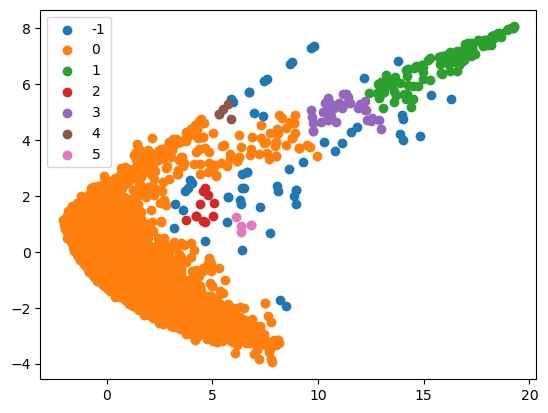

In [27]:
label = dblabels
u_labels = np.unique(label)
#print(u_labels) 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
#plt.ylim(-0.1e6, 0.1e6)
plt.legend()
plt.show()

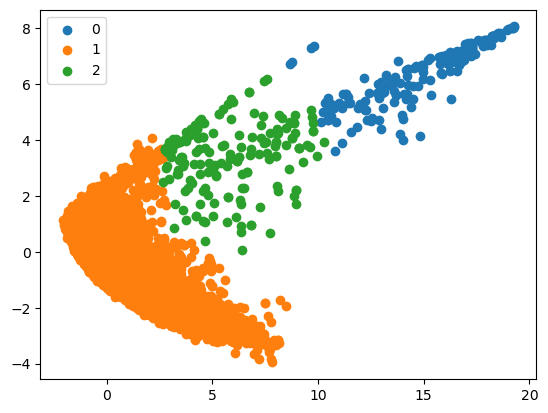

In [28]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='average')

mss = agg.fit_predict(X_pca)

label = mss
u_labels = np.unique(label)
#print(u_labels) 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_pca[label == i , 0] , X_pca[label == i , 1] , label = i)
#plt.ylim(-0.1e6, 0.1e6)
plt.legend()
plt.show()

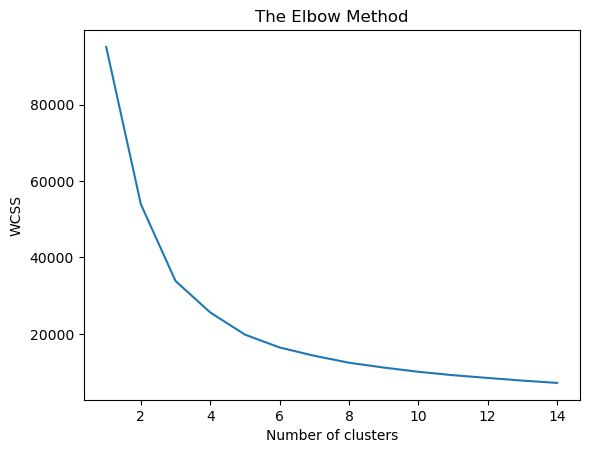

In [35]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10,
                random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


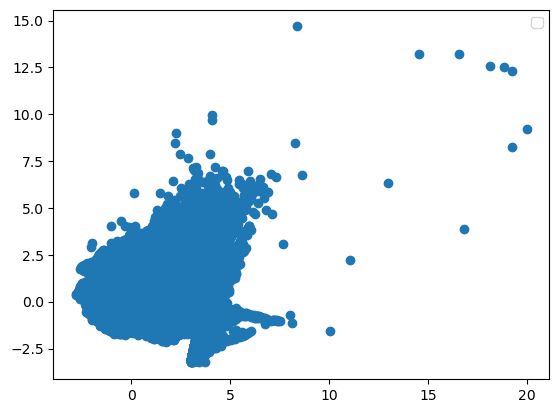

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.legend()
plt.show()

In [9]:
pca = PCA(n_components=2)
pca.fit_transform(X_cut)

# Dump components relations with features:
ratios = pd.DataFrame(pca.components_,columns=X_cut.columns,index = ['PC-1','PC-2']).T
ratios['TrueVal'] = abs(ratios['PC-1']) + abs(ratios['PC-2'])#
bv = []
x=0
for i in ratios['TrueVal'].argsort()[::-1]:
    if ratios['TrueVal'][i] > 0.0001:
        print(f"{i:<12}" f"{all_variables[i]:<48}"   f"{ratios['TrueVal'][i]:.3f}")
        bv.append(all_variables[i])
        x += 1
    if x>4:
        break
print(bv)

8           p_pt_track                                      1.001
33          p_eAccCluster                                   0.297
25          p_rawECluster                                   0.271
22          p_eCluster                                      0.271
156         p_E7x11_Lr2                                     0.270
['p_pt_track', 'p_eAccCluster', 'p_rawECluster', 'p_eCluster', 'p_E7x11_Lr2']


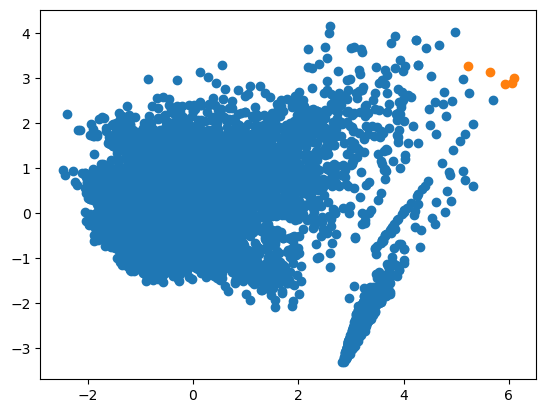

In [64]:
['p_f1core', 'p_E_Lr1_MedG', 'p_E3x5_Lr1', 'p_eClusterLr1', 'p_e1152']
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = X_pca[label == 0]
filtered_label1 = X_pca[label == 1]
#plt.xlim(-1e6, 1e6)
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()
